In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import scipy
import seaborn as sns
import matplotlib.font_manager as fm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import random


Bad key text.latex.preview in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [2]:
warnings.simplefilter('ignore')

In [3]:
font_path = "C:\\Users\\spa84\\Downloads\\text_mining\\NanumGothic.ttf"  # 나눔 폰트의 경로를 지정
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font_name)

In [8]:
df = pd.read_csv('./data/Before_Encoding_5000.csv', encoding='euc-kr')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Building_Age                 5000 non-null   int64         
 1   JS_Price                     5000 non-null   int64         
 2   JS_BA                        5000 non-null   float64       
 3   Population                   5000 non-null   int64         
 4   UR                           5000 non-null   float64       
 5   LC_index                     5000 non-null   float64       
 6   CA_index                     5000 non-null   float64       
 7   TC_index                     5000 non-null   float64       
 8   SDT_index                    5000 non-null   float64       
 9   HSP_index                    5000 non-null   float64       
 10  Sell_Price                   5000 non-null   float64       
 11  Crime_Rates                  5000 non-null 

## Categorical:

- Nominal(variables that have two or more categories, but which do not have an intrinsic order.)

    - Region_Name : 자치구 명
    - Building_Use : 건물 용도
    
- Ordinal(variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked.)

    
## Numeric:

- Discrete
    - YearMonth : 년월
    - Building_Age : 건물연식
    - JS_Price : 전세가
   
- Continous
    - Sell_Price : 매매 가격
    - JS_BA = JS_Building Area : 임대 면적
    - lR = Interest Rate : 금리
    - UR = Unemployment Rate : 실업률
    - LC_index = Leading Composite index : 선행종합 지수
    - CA_index = Comprehensive Accompany index : 동행종합 지수
    - TC_index = Trailing Composite index : 후행종합 지수
    - SDT_index = Supply and Demand Trend index = 전세수급동향 지수
    - HSP_index = 
    - Population : 인구수
    - Crime_Rates : 범죄율
    - Shortest_Distance_to_Subway : 가장 가까운 지하철역과의 거리
    - Shortest_Distance_to_School : 가장 가까운 초중고등학교와의 거리
    - Shortest_Distance_to_Univ : 가장 가까운 대학교와의 거리
    - Shortest_Distance_to_Park : 가장 가까운 공원과의 거리
    

## 데이터전처리

### 인코딩

In [9]:
def target_encoding(df, target_column, categorical_columns):
    df_encoded = df.copy()
    
    for column in categorical_columns:
        if df[column].dtype == object:
            encoding_map = df.groupby(column)[target_column].mean().to_dict()
            df_encoded[column] = df_encoded[column].map(encoding_map)
    
    return df_encoded

categorical_columns = ['Building_Use', 'Region_Name']
df_encoded = target_encoding(df, 'JS_Price', categorical_columns)

In [112]:
df_encoded

,Building_Age,JS_BA,Population,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,Sell_Price,Crime_Rates,IR,Region_Name,YearMonth,Shortest_Distance_to_Subway,Shortest_Distance_to_School,Shortest_Distance_to_Univ,JS_Price_Category
0,13,113.00,557563,3.800000,72.000000,78.200000,74.200000,114.344505,81.200000,54000.00,1.179391,2.75,강남구,2011-01-01,522.643644,404.136438,2717.110673,0
1,12,59.96,486546,3.800000,72.000000,78.200000,74.200000,114.538757,81.200000,32700.00,1.198929,2.75,강동구,2011-01-01,818.829456,297.921220,1639.799834,0
2,0,84.83,486546,3.800000,72.000000,78.200000,74.200000,112.364655,81.200000,37259.50,1.196367,2.75,강동구,2011-01-01,747.428903,293.062666,5348.572633,0
3,25,84.91,486546,3.800000,72.000000,78.200000,74.200000,114.367050,81.200000,73950.00,1.136842,2.75,강동구,2011-01-01,288.600945,278.705356,3964.052557,0
4,8,84.71,339529,3.800000,72.000000,78.200000,74.200000,114.253929,81.200000,36811.54,1.163344,2.75,강북구,2011-01-01,813.256037,123.423393,423.404193,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,14,61.12,463298,3.396246,102.655098,101.286736,100.780952,128.892242,157.060776,30000.00,0.876201,3.50,은평구,2023-08-01,403.928032,242.558160,1248.315088,0
4996,6,72.97,121441,3.399868,102.644089,101.288506,100.840019,128.765762,158.125519,149800.00,0.779714,3.50,중구,2023-08-01,581.172513,104.769954,842.570488,1
4997,15,84.90,121441,4.100200,103.102043,101.486321,101.099960,133.370956,161.393890,87000.00,1.162222,3.50,중구,2023-08-01,604.059863,457.714066,1629.373539,0
4998,21,57.69,384272,3.399715,102.641594,101.314041,100.785660,128.765762,158.030884,27500.00,0.790527,3.50,중랑구,2023-08-01,1261.635711,206.651345,1741.126762,0


### 종속변수 변환

In [108]:
# JS_Price를 4개의 범주로 나누고 기존 변수 삭제
df['JS_Price_Category'] = pd.cut(df['JS_Price'], bins=5, labels=False)
df.drop('JS_Price', axis=1, inplace=True)

### 오버샘플링
- 클래스 별 샘플 수 차이로 인해 오버샘플링 진행

In [113]:
df_encoded['JS_Price_Category'].value_counts()

0    4501
1     437
2      48
3      12
4       2
Name: JS_Price_Category, dtype: int64

In [114]:
from imblearn.over_sampling import RandomOverSampler

# 오버샘플링할 데이터와 레이블을 준비합니다.
X = df_encoded.drop('JS_Price_Category', axis=1)  # 독립변수
y = df_encoded['JS_Price_Category']  # 종속변수

# RandomOverSampler를 초기화합니다.
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# 오버샘플링을 적용합니다.
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# 오버샘플링된 데이터를 새로운 데이터프레임으로 만듭니다.
df_encoded = pd.concat([X_resampled, y_resampled], axis=1)

In [115]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22505 entries, 0 to 22504
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Building_Age                 22505 non-null  int64         
 1   JS_BA                        22505 non-null  float64       
 2   Population                   22505 non-null  int64         
 3   UR                           22505 non-null  float64       
 4   LC_index                     22505 non-null  float64       
 5   CA_index                     22505 non-null  float64       
 6   TC_index                     22505 non-null  float64       
 7   SDT_index                    22505 non-null  float64       
 8   HSP_index                    22505 non-null  float64       
 9   Sell_Price                   22505 non-null  float64       
 10  Crime_Rates                  22505 non-null  float64       
 11  IR                           22505 non-nu

## Logistic Regression Analysis

In [116]:
selected_features = ['CA_index',
'Shortest_Distance_to_School',
'HSP_index',
'TC_index',
'IR',
'SDT_index',
'UR']

In [117]:
# 독립 변수 선택
X = df_encoded[selected_features]

# 종속 변수 선택 (JS_Price_Category, 다중 분류)
Y = df_encoded['JS_Price_Category']

# 층화 추출을 사용하여 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# 표준화 (선택적)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 다항 로지스틱 회귀 모델 생성
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, Y_train)

# 모델 평가 (정확도 계산)
accuracy = model.score(X_test, Y_test)
print(f"모델 정확도 : {accuracy}", '\n')

# 각 클래스에 속할 확률 예측
probabilities = model.predict_proba(X_test)

# 예측 결과 클래스 (가장 높은 확률을 갖는 클래스 선택)
predicted_classes = model.predict(X_test)

# 예측된 클래스 및 확률 출력
print("---예측된 클래스---", '\n', predicted_classes, '\n')
print("---클래스별 확률---", '\n', probabilities)

모델 정확도 : 0.40502110642079536 

---예측된 클래스--- 
 [3 3 3 ... 3 4 3] 

---클래스별 확률--- 
 [[0.05541938 0.18912412 0.26227862 0.46235479 0.03082309]
 [0.0910457  0.23866948 0.30160163 0.35055942 0.01812377]
 [0.09368216 0.19307197 0.18534211 0.33050327 0.19740049]
 ...
 [0.13805987 0.20777019 0.18960579 0.29699981 0.16756435]
 [0.05546524 0.15197877 0.1627764  0.20689669 0.4228829 ]
 [0.13805987 0.20777019 0.18960579 0.29699981 0.16756435]]


### 로지스틱 회귀 분석의 통계량
- 양수 회귀 계수는 종속 변수를 증가시키는 데 긍정적인 영향을 미치고, 음수 회귀 계수는 종속 변수를 감소시키는 데 부정적인 영향을 미칩니다.
- 오즈비가 1보다 크면 해당 독립 변수가 종속 변수의 확률에 긍정적인 영향을 미칩니다. 오즈비가 1보다 작으면 부정적인 영향을 미칩니다.

In [118]:
# 회귀 모델을 이미 만들었다고 가정합니다.
# model은 이미 다중 클래스 로지스틱 회귀 모델로 훈련되어 있다고 가정합니다.

# 독립 변수의 열 이름
independent_variable_names = selected_features 

# 종속 변수 열의 이름을 식별하고 고유한 클래스 값을 확인합니다.
dependent_variable_column = "JS_Price_Category"
dependent_variable_classes = df_encoded[dependent_variable_column].unique()

# 회귀 계수 출력
coefficients = model.coef_

# 각 독립 변수와 종속 변수 클래스에 대한 회귀 계수와 오즈비를 출력합니다.
for i, dep_class in enumerate(dependent_variable_classes):
    print(f"종속 변수 클래스: {dep_class}")
    for j, indep_var in enumerate(independent_variable_names):
        coef = coefficients[i][j]
        odds_ratio = np.exp(coef)
        print(f"{indep_var} - 회귀 계수: {coef}, 오즈비: {odds_ratio}")

종속 변수 클래스: 0
CA_index - 회귀 계수: -2.833060211256286, 오즈비: 0.058832537913256225
Shortest_Distance_to_School - 회귀 계수: 0.5009457305735816, 오즈비: 1.6502812543589922
HSP_index - 회귀 계수: -0.09545472308142128, 오즈비: 0.9089595156079816
TC_index - 회귀 계수: 1.552740678622515, 오즈비: 4.724400519055494
IR - 회귀 계수: 0.19287674355203516, 오즈비: 1.212733307106964
SDT_index - 회귀 계수: -0.21289373893327682, 오즈비: 0.8082420173124824
UR - 회귀 계수: 0.07680806408902452, 오즈비: 1.079834797425551
종속 변수 클래스: 1
CA_index - 회귀 계수: -2.5698154047464636, 오즈비: 0.07654967482639377
Shortest_Distance_to_School - 회귀 계수: 0.1207699285549391, 오즈비: 1.128365277871211
HSP_index - 회귀 계수: -0.08700150959463308, 오즈비: 0.9166757118233729
TC_index - 회귀 계수: 2.0234313309464467, 오즈비: 7.564235850333287
IR - 회귀 계수: 0.05937000822074303, 오즈비: 1.061167808921842
SDT_index - 회귀 계수: -0.13345391839714843, 오즈비: 0.8750677925750072
UR - 회귀 계수: 0.04565732453126023, 오즈비: 1.046715665712465
종속 변수 클래스: 2
CA_index - 회귀 계수: -1.46711825293368, 오즈비: 0.23058902790107086
Short

## 다중공선성 체크

In [119]:
# 독립 변수 데이터프레임을 준비합니다. 여기서는 X_train을 사용합니다.
# X_train은 모델 훈련에 사용된 독립 변수 데이터입니다.
independent_variables = pd.DataFrame(X_train, columns=selected_features)

# VIF 계산을 위한 함수를 정의합니다.
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

# VIF를 계산합니다.
vif_result = calculate_vif(independent_variables)

# VIF 결과를 출력합니다.
print(vif_result)

                      Variable        VIF
0                     CA_index  81.152163
1  Shortest_Distance_to_School   1.062077
2                    HSP_index   8.823880
3                     TC_index  96.348965
4                           IR   4.854797
5                    SDT_index   3.467630
6                           UR   1.406075


- VIF값 5를 기준으로 높으면 변수에서 제거할 요인으로 본다면 CA_index, TC_index, HSP_index를 제외한다.

## 과적합 체크

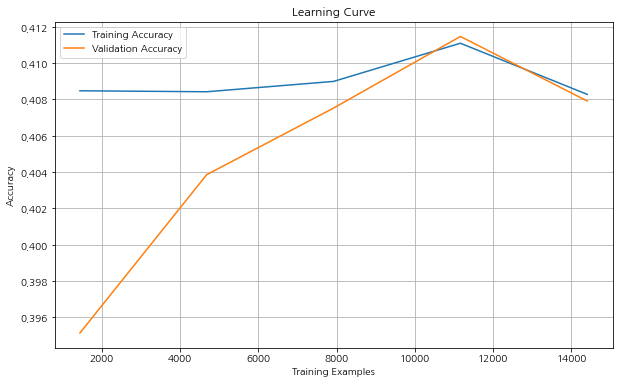

In [120]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 학습 곡선 생성
train_sizes, train_scores, test_scores = learning_curve(model, X_train, Y_train, cv=5)

# 평균 정확도 계산
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# 학습 곡선 그리기
plt.figure(figsize=(10, 6))
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid()

plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.legend(loc='best')

plt.show()

## 변수선택법
- p-value로 최종선택

In [121]:
# 로지스틱 회귀 모델 생성 (다항 로지스틱 회귀 모델)
model = sm.MNLogit(Y, sm.add_constant(X))  # 상수항 추가

# 모델 피팅
result = model.fit()

# 독립 변수들의 p-value 추출
p_values = result.pvalues
p_values

Optimization terminated successfully.
         Current function value: 1.352376
         Iterations 8


,0,1,2,3
const,8.082456e-20,1.136086e-39,2.126471e-201,6.809555e-85
CA_index,8.800216e-02,6.620336e-14,2.606063e-145,2.583866e-112
Shortest_Distance_to_School,8.750932e-63,1.761802e-67,1.283120e-148,3.464919e-190
HSP_index,3.488886e-01,3.817541e-05,5.912654e-25,1.403398e-21
TC_index,9.535840e-03,1.385274e-02,4.513211e-36,1.505531e-73
IR,1.693123e-02,6.800910e-01,2.091473e-03,1.592927e-08
SDT_index,2.889325e-03,5.229372e-04,4.113181e-38,3.759672e-24
UR,4.198028e-01,5.618762e-08,9.327950e-01,2.336532e-10


- a=0.05일 때, p-value값을 고려하면 IR, UR, HSP_index, CA_index을 제외한다.

## 최종결론
- Features_Ranking의 17가지 변수 중 상위 10가지를 제외한 7가지 변수에 대해 VIF와 Logistic Regression Analysis를 진행한다.
    - VIF와 Logistit Regression의 p-value값의 공통 제거요인인 HSP_index, CA_index
    - 전체 p-value에서 가장 높은 값을 가지고 Features_Ranking에서도 최하위에 속하는 UR
    - 위의 세가지 요인(HSP_index, CA_index, UR)을 변수에서 제거하여 머신러닝을 진행한다.